# Problema 2

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance


A) Descargue un conjunto de datos y elija 4 variables numéricas según
su interés. Calcule el vector de medias, la matriz de covarianzas y su
inversa.

In [15]:
df = pd.read_csv("BTC-USD.csv")
data = df[["Open","High","Close","Low","Volume"]]
data.head()

,Open,High,Close,Low,Volume
0,465.864014,468.174011,457.334015,452.421997,21056800
1,456.859985,456.859985,424.440002,413.104004,34483200
2,424.102997,427.834991,394.795990,384.532013,37919700
3,394.673004,423.295990,408.903992,389.882996,36863600
4,408.084991,412.425995,398.821014,393.181000,26580100


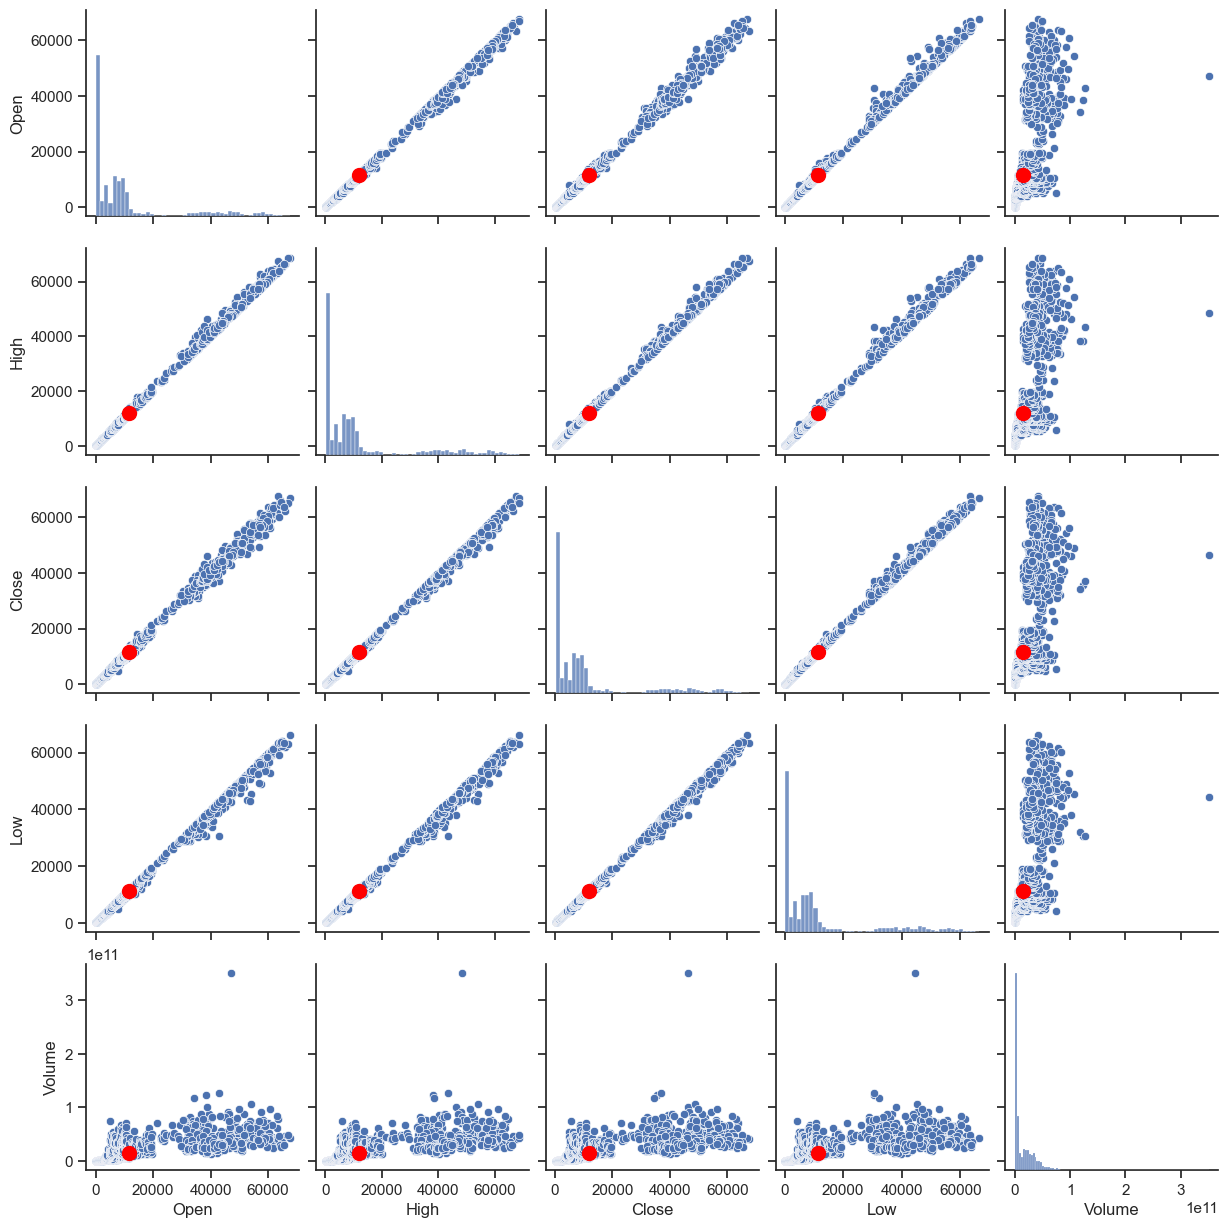

In [16]:
sns.set(style="ticks")
pair_plot = sns.pairplot(data)

variable_means = data.mean()

for i, ax_row, in enumerate(pair_plot.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            x = variable_means[x_label]
            y = variable_means[y_label]
            ax.scatter(x, y, color="red", marker="o", s=100)
            
plt.show()

Create the covariance matrix

In [17]:
cov_matrix = data.cov()
cov_matrix

,Open,High,Close,Low,Volume
Open,2.664627e+08,2.734472e+08,2.662556e+08,2.581034e+08,2.360339e+14
High,2.734472e+08,2.808831e+08,2.735483e+08,2.649777e+08,2.435775e+14
Close,2.662556e+08,2.735483e+08,2.666752e+08,2.582769e+08,2.358148e+14
Low,2.581034e+08,2.649777e+08,2.582769e+08,2.504491e+08,2.264171e+14
Volume,2.360339e+14,2.435775e+14,2.358148e+14,2.264171e+14,3.979303e+20


create the inverse matrix

In [18]:
try:
    cov_matrix_inverse = np.linalg.inv(cov_matrix)
    df_matrix_inverse = pd.DataFrame(cov_matrix_inverse)
except np.linalg.LinAlgError:
    # Handle the case where the matrix is not invertible (singular or nearly singular)
    cov_matrix_inverse = None

B) Llame Z a la matriz de datos obtenida al restar la media de cada
observación. ¿Cuál es la relación entre ZT * Z y la matriz de covarianza?

In [19]:
Z = data.apply(lambda value: value - variable_means, axis=1)
Zt = Z.T
Zt_Z = Zt @ Z

In [20]:
n = len(Z)
cov_Z = Zt_Z.apply(lambda value: value / (n - 1), axis=1)
print("manual calculate of the covariance matrix")
display(cov_Z)
print("pandas calculate of the covariance matrix")
display(cov_matrix)

manual calculate of the covariance matrix


,Open,High,Close,Low,Volume
Open,2.664627e+08,2.734472e+08,2.662556e+08,2.581034e+08,2.360339e+14
High,2.734472e+08,2.808831e+08,2.735483e+08,2.649777e+08,2.435775e+14
Close,2.662556e+08,2.735483e+08,2.666752e+08,2.582769e+08,2.358148e+14
Low,2.581034e+08,2.649777e+08,2.582769e+08,2.504491e+08,2.264171e+14
Volume,2.360339e+14,2.435775e+14,2.358148e+14,2.264171e+14,3.979303e+20


pandas calculate of the covariance matrix


,Open,High,Close,Low,Volume
Open,2.664627e+08,2.734472e+08,2.662556e+08,2.581034e+08,2.360339e+14
High,2.734472e+08,2.808831e+08,2.735483e+08,2.649777e+08,2.435775e+14
Close,2.662556e+08,2.735483e+08,2.666752e+08,2.582769e+08,2.358148e+14
Low,2.581034e+08,2.649777e+08,2.582769e+08,2.504491e+08,2.264171e+14
Volume,2.360339e+14,2.435775e+14,2.358148e+14,2.264171e+14,3.979303e+20


The relation between ZT * Z with the covariance is:

(n-1)(cov(data)) = ZT * Z 

C) Calcule la distancia de Mahalanobis de cada observación respecto al
vector de medias. Realice una grá ca de dispersión de variables dos a
dos coloreando cada observación de acuerdo con la distancia calculada.

In [21]:

# Example covariance matrix (replace this with your actual covariance matrix)
cov_matrix = data.cov()

# Define the mean vector (replace with your actual mean vector if needed)
mean_vector = data.mean()

# Define a custom function to calculate Mahalanobis distance for a row
def mahalanobis_distance(row):
    row_vector = np.array(row)
    return distance.mahalanobis(row_vector, mean_vector, np.linalg.inv(cov_matrix))

data2 = data
mahalanobis_distances = data2.apply(mahalanobis_distance, axis=1)


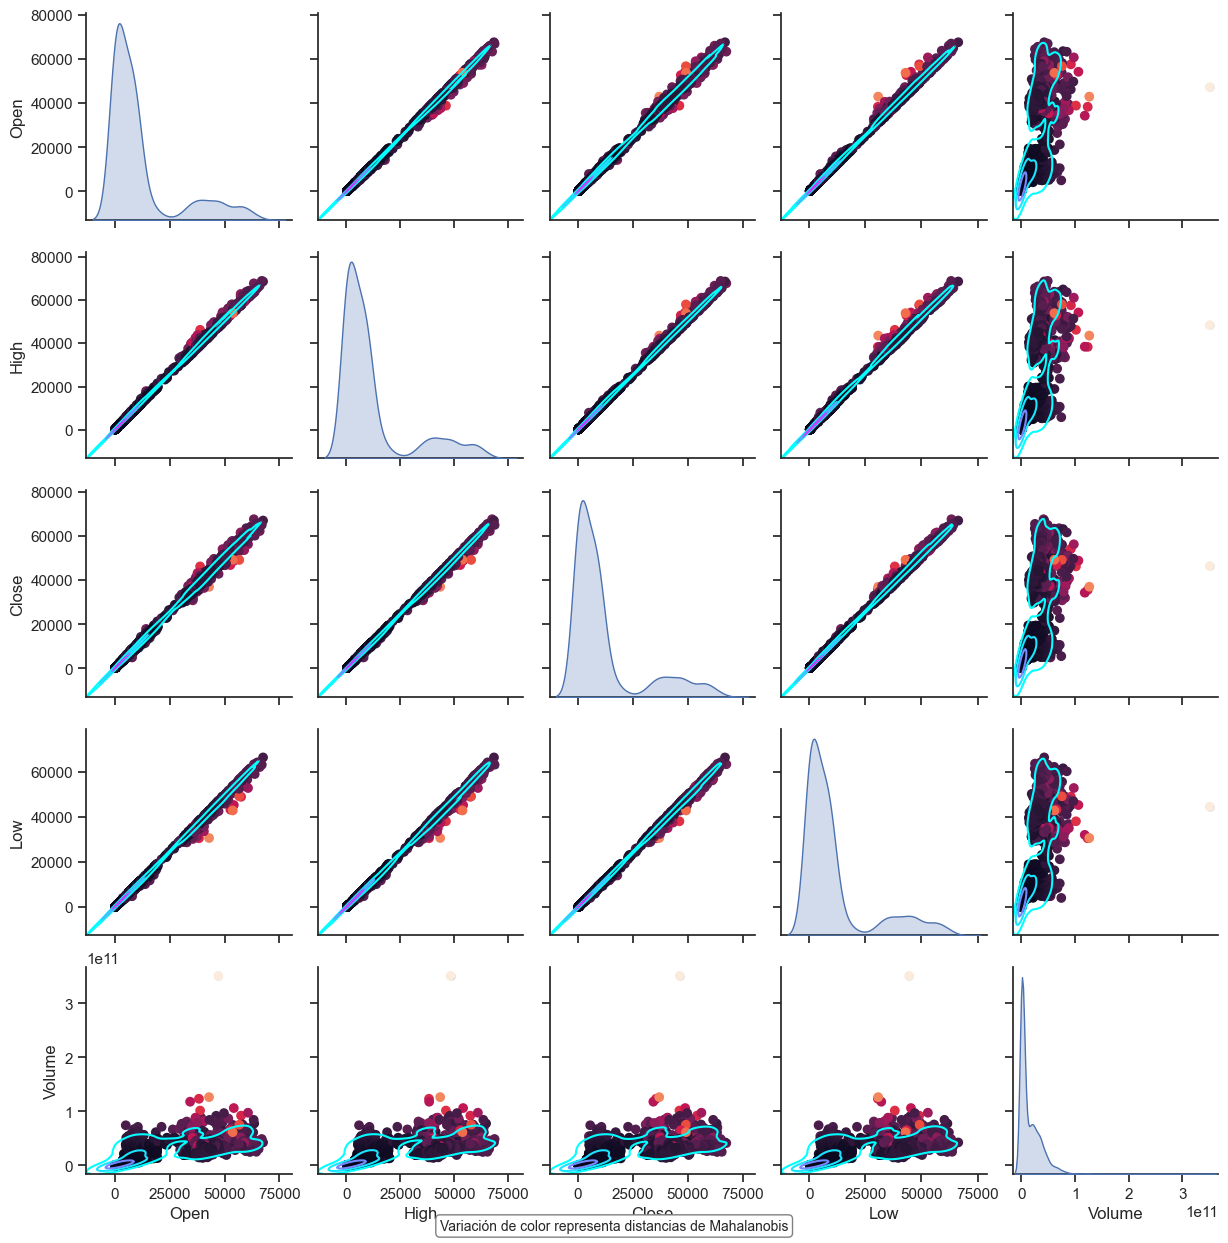

In [22]:
sns.set(style="ticks")
pair_plot = sns.pairplot(data2, diag_kind="kde")

# Map lower triangular plots with Mahalanobis distances using KDE
for i, ax_row in enumerate(pair_plot.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            x = data2[x_label]
            y = data2[y_label]
            ax.scatter(x, y, c=mahalanobis_distances, cmap=None, marker=None, s=None)

# Corrected code to set the colormap for KDE plots
pair_plot.map_lower(sns.kdeplot, levels=4, color=".2", cmap="cool")
pair_plot.map_upper(sns.kdeplot, levels=4, color=".2", cmap="cool")
plt.figtext(
    0.5,
    0.01,
    "Variación de color representa distancias de Mahalanobis",
    ha="center",
    fontsize=10,
    bbox={"facecolor": "white", "edgecolor": "gray", "boxstyle": "round"},
)


plt.show()

D) Identifique que la bola de radio 1 con centro en el vector de medias respecto
a la distancia de Mahalanobis en la gráfica del punto anterior.

/var/folders/nz/j6px70h134sbbj9vwy0gpzm40000gn/T/ipykernel_56896/3214667872.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "distancias_mahalanobis"] = mahalanobis_distances  # Use .loc here


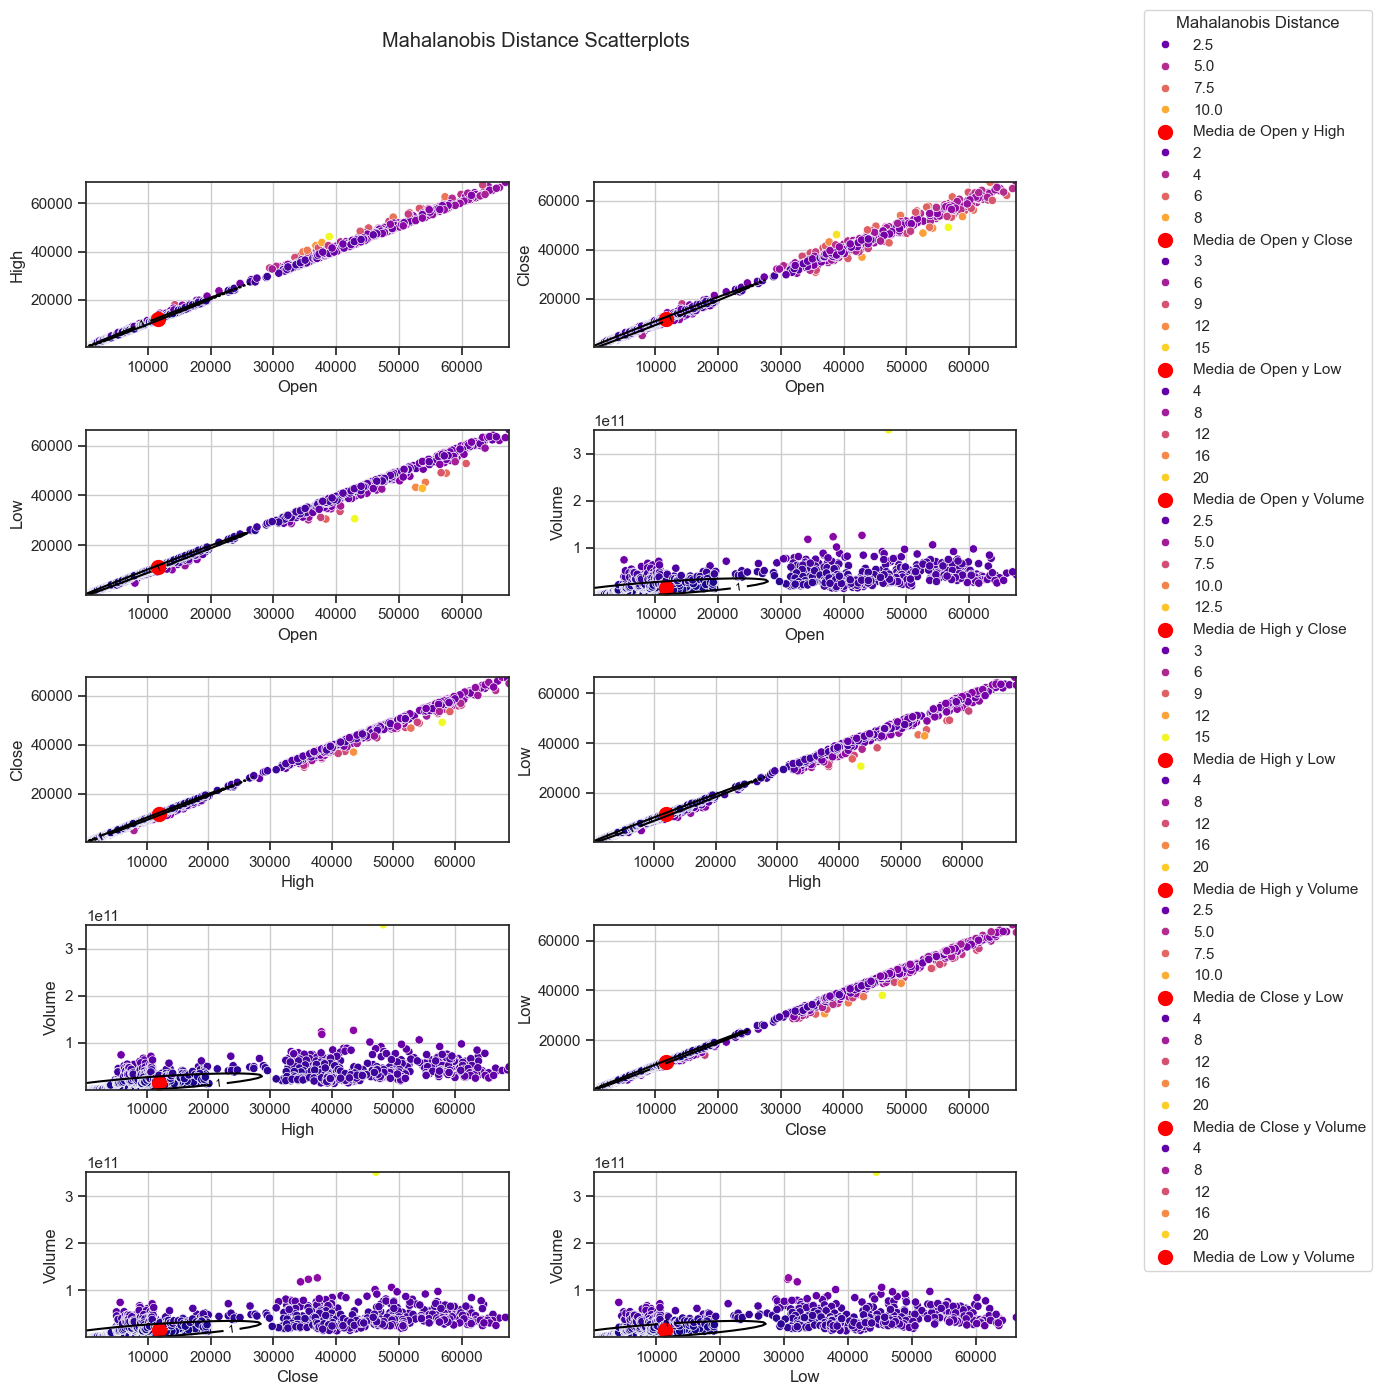

In [23]:
variable_pairs = [
    ("Open", "High"),
    ("Open", "Close"),
    ("Open", "Low"),
    ("Open", "Volume"),
    ("High", "Close"),
    ("High", "Low"),
    ("High", "Volume"),
    ("Close", "Low"),
    ("Close", "Volume"),
    ("Low", "Volume"),
]

# Create subplots for all pairs of variables
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Mahalanobis Distance Scatterplots")

for (var1, var2), ax in zip(variable_pairs, axes.flatten()):
    means_vector = data[[var1, var2]].mean().values
    cov_matrix = data[[var1, var2]].cov().values

    # Calculate Mahalanobis distances for each observation
    mahalanobis_distances = []
    for i, row in data.iterrows():
        observation = row[[var1, var2]].values
        mahalanobis_distance = distance.mahalanobis(
            observation, means_vector, np.linalg.inv(cov_matrix)
        )
        mahalanobis_distances.append(mahalanobis_distance)

    # Assign Mahalanobis distances using .loc
    data.loc[:, "distancias_mahalanobis"] = mahalanobis_distances  # Use .loc here

    # Scatterplot with Mahalanobis distances as hue
    sns.scatterplot(
        data=data, x=var1, y=var2, hue="distancias_mahalanobis", palette="plasma", ax=ax
    )
    ax.scatter(
        means_vector[0],
        means_vector[1],
        color="red",
        marker="o",
        s=100,
        label=f"Media de {var1} y {var2}",
    )

    # Calculate the grid for Mahalanobis distance contour
    x_min, x_max = data[var1].min(), data[var1].max()
    y_min, y_max = data[var2].min(), data[var2].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.zeros_like(xx)

    # Calculate the Mahalanobis distance for each point in the grid
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            point = np.array([xx[i, j], yy[i, j]])
            difference = point - means_vector
            mahalanobis_distance = distance.mahalanobis(
                point, means_vector, np.linalg.inv(cov_matrix)
            )
            Z[i, j] = mahalanobis_distance

    # Draw contour lines for Mahalanobis distance threshold of 1
    contours = ax.contour(xx, yy, Z, levels=[1], colors="black")
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.legend().remove()  # Remover la leyenda original

    # Añadir una cuadrícula
    ax.grid(True)

# Crear una leyenda común para todos los gráficos
legend = fig.legend(loc="upper left", bbox_to_anchor=(1, 1))
legend.set_title("Mahalanobis Distance")

plt.show()